# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [4]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df['title_length'] 


0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64

In [7]:
# Calcula media, mediana y moda de la columna 'title_length'
#df['title_length'].describe() # metodo carlos

media = df["title_length"].mean()
mediana = df["title_length"].median()
moda = mode(df["title_length"], keepdims=False).mode 

print(f" Media de longitud de título: {media} caracteres")
print(f" Mediana de longitud de título: {mediana} caracteres")
print(f"Moda: {moda} caracteres")



 Media de longitud de título: 15.481103166496425 caracteres
 Mediana de longitud de título: 14.0 caracteres
Moda: 12 caracteres


In [27]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["title_length"].max() - df["title_length"].min()
print(f"Rango: {rango} caracteres")

varianza = df["title_length"].var()
print(f"Varianza: {varianza}")

desviacion = df["title_length"].std()
print(f"Desviación estándar: {desviacion}")

Rango: 67 caracteres
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [28]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df["title_length"])
print(f"Asimetría: {asimetria}")

curtosis_valor = kurtosis(df["title_length"])
print(f"Curtosis: {curtosis_valor}")

Asimetría: 1.5229143965677572
Curtosis: 3.7867237597626007


In [6]:
# Imprime el título más corto y el título más largo según su longitud
titulo_corto = df.loc[df["title_length"] ==df["title_length"].min(),"title"]
print(f"Ttulo más corto ({df['title_length'].min()}caracteres):")
print(titulo_corto.values)

titulo_largo =df.loc[df["title_length"] ==df["title_length"].max(), "title"]
print(f"Titulo más largo ({df['title_length'].max()} caractere):")
print(titulo_largo.values)

Ttulo más corto (1caracteres):
['M']
Titulo más largo (68 caractere):
['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']


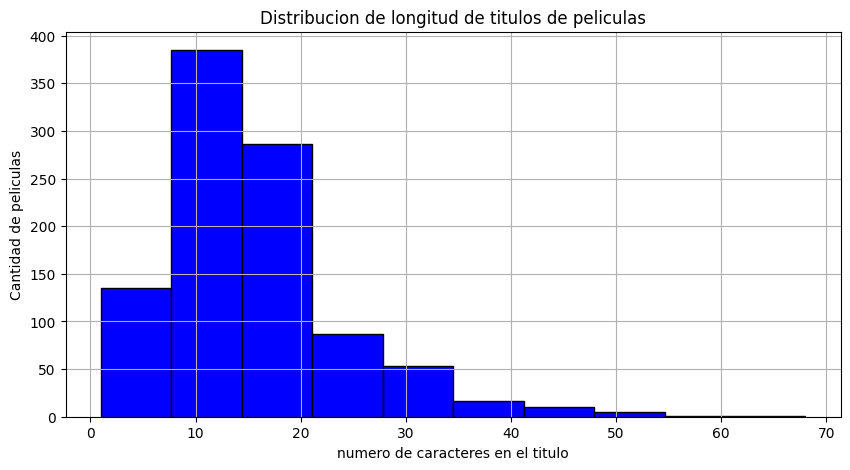

In [ ]:
plt.figure(figsize=(10, 5))  # Tamaño cómodo para visual
plt.hist(df["title_length"], color="blue",edgecolor="black")
plt.title("Distribucion de longitud de titulos de peliculas")
plt.xlabel("numero de caracteres en el titulo")
plt.ylabel("Cantidad de peliculas")
plt.grid(True)
plt.show()     # no se como poner el numero exacto en el histograma

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [56]:
titulos_ejemplo = df['title_length'].sample(5, random_state=42)
print("Longitudes seleccionadas:", titulos_ejemplo.values)

Longitudes seleccionadas: [22 19  7 15 19]


In [ ]:
longitudes = titulos_ejemplo.values # paso a lista y saco el array
longitudes

array([22, 19,  7, 15, 19])

In [ ]:
media = sum(longitudes) /len(longitudes)
media

np.float64(16.4)

In [64]:
# Restar cada valor con la media y elevar al cuadrado
diferencias_cuadradas = [(x - media) ** 2 for x in longitudes]

#Calcular la varianza (n - 1 porque es muestra)
varianza = sum(diferencias_cuadradas) / (len(longitudes) - 1)

# Sacar raíz cuadrada → desviación estándar
desviacion_estandar = varianza ** 0.5
print(f"Desviación estándar: {desviacion_estandar}")

Desviación estándar: 5.813776741499454


In [65]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
valores_seleccionados = df['title_length'].sample(5, random_state=42).tolist()

# Mostrar la lista
print("Lista de 5 longitudes de títulos:", valores_seleccionados)

Lista de 5 longitudes de títulos: [22, 19, 7, 15, 19]


In [66]:
# Calcula la media de los 5 valores
valores = [22, 19, 7, 15, 19] 
media = sum(valores) / len(valores)
print(f"La media de los 5 valores es: {media} caracteres")

La media de los 5 valores es: 16.4 caracteres


In [ ]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadradas = [(x - media) ** 2 for x in valores]

# Mostrar cada paso
for i, dif in enumerate(diferencias_cuadradas, start=1):
    print(f"Valor {valores[i-1]} → diferencia² = {dif}")

Valor 22 → diferencia² = 31.360000000000017
Valor 19 → diferencia² = 6.760000000000008
Valor 7 → diferencia² = 88.35999999999997
Valor 15 → diferencia² = 1.959999999999996
Valor 19 → diferencia² = 6.760000000000008


In [69]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

# Calcular la varianza (n - 1 porque es muestra)
varianza = sum(diferencias_cuadradas) / (len(valores) - 1)

desviacion_estandar = varianza ** 0.5

print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_estandar}")

Varianza: 33.800000000000004
Desviación estándar: 5.813776741499454
